Finding the Top 5% of Observations for use in the outlier analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data_meta_analysis/Data_Classifications_v8b.csv')

In [3]:
X = pd.read_csv('../data_meta_analysis/data_derived_meta_analysis/X_region1_v8b.csv')

In [4]:
# add aal names
for row in range(X.shape[0]):
    df.loc[row,'AAL.Region.2']=','.join(list(X.columns[X.loc[row,:]==1]))

In [5]:
df.head()
len(df)

891

In [6]:
print(df.PID.unique())
print(len(df.PID.unique()))

[ 1  2  5  6  7  8  9 10 11 12 13 16 18 20 21 22 23 24 25 26 27 28 31 32 33
 37 39 41 42 43 46 47 48 49 50 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92
 93]
76


Find the 95% percetile for the raw accuracy data (na's excluded). 

In [7]:
acc = df['Accuracy.50'].as_matrix()[:]
acc = acc[~np.isnan(acc)]
p95 = np.percentile(acc,95)
print(p95)

0.75


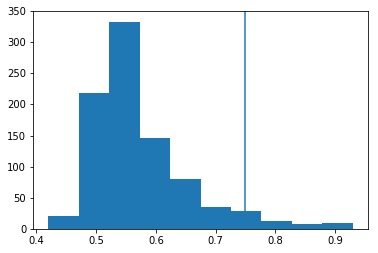

In [8]:

plt.hist(acc)
plt.axvline(x=p95)

There are 41 observations of accuracy > .75 coming from 11 papers. 

In [12]:
outliers = df.loc[df['Accuracy.50']>p95,]
print(len(outliers))
outliers_unique = outliers.PID.unique()
outliers_unique.sort()
print((outliers_unique))
print(len(outliers.PID.unique()))

41
[31 39 48 50 52 54 66 69 70 71 78]
11


In [16]:
#outliers

Nice, these are the same. 

Save to look at 

In [13]:
outliers.head()

,Unnamed: 0,PID,Year,Title,Info.type,Source.in.paper,Task.variable.decoded,Accuracy.50,Accuracy.other,Num_classes,...,Unkown Atlas,Method.of.Assigning.Region,Region.name,Voxel.numbers,Training.setsize,Accuracy.50.Median,Notes,More.Notes,Accuracy.50.original,AAL.Region.2
338,338,31,2014,Using fMRI to decode true thoughts independent...,Rule,Figure 8,cross task prediction of whether subjects woul...,0.77,NaN,2,...,left middle frontal gyrus,name similarity,left middle frontal gyrus,59.0,18.0,NaN,NaN,NaN,0.77,Frontal_Mid_L
380,380,39,2010,Neural Responses to unattended products predic...,Value,Table 2,Whether viewed product was subsequently chosen...,0.76,NaN,2,...,NaN,coordinate transfer,Middle frontal gyrus_,251.0,12.0,NaN,NaN,NaN,0.76,Frontal_Sup_R
381,381,39,2010,Neural Responses to unattended products predic...,Value,Table 2,Whether viewed product was subsequently chosen...,0.76,NaN,2,...,NaN,coordinate transfer,mPFC_,251.0,12.0,NaN,NaN,NaN,0.76,Cingulum_Ant_R
382,382,39,2010,Neural Responses to unattended products predic...,Value,Table 2,Whether viewed product was subsequently chosen...,0.77,NaN,2,...,NaN,coordinate transfer,mPFC_,251.0,12.0,NaN,NaN,NaN,0.77,Frontal_Sup_R
383,383,39,2010,Neural Responses to unattended products predic...,Value,Table 2,Whether viewed product was subsequently chosen...,0.79,NaN,2,...,NaN,coordinate transfer,Middle frontal gyrus_,251.0,12.0,NaN,NaN,NaN,0.79,Frontal_Sup_R


In [14]:
outliers.to_csv('../data_meta_analysis/data_derived_meta_analysis/outliers_dataframe_with_full_data_v8b.csv',header=True)

### Compare versions

paper 69 had two accuracies that dropped 1-2 percentage points from 80% to 78% and 85% to 84%. 
paper 50 had one accuracy that dropped from 85% to 75%. 

Otherwise, it contains the same accuracies. Thank god. 